In [1]:
# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
import pickle
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
from pathlib import Path

In [2]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

In [3]:
def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

In [5]:
# 
# le todos os labels, até a posição 32
#
files= glob( os.path.join( 'C:/mestrado/datasets/unified/final-5K/train/labels', "*.pgn"))

In [6]:
#
# faz a contagem de cada  um. usar panda
#
labels= [read_label( f) for f in files]

In [9]:
#split e pega os primeiros 32
tokens= [label.split()[:32] for label in labels]

In [11]:
# junta numa lista
flat_tokens = [t for tlist in tokens for t in tlist]

In [12]:
print( len( flat_tokens))

128000


In [13]:
from collections import Counter

In [14]:
count= Counter( flat_tokens)

In [15]:
count

Counter({'a3': 809,
         'd5': 2736,
         'd4': 3507,
         'Nf6': 3644,
         'Nf3': 3633,
         'Bg4': 609,
         'e3': 944,
         'e6': 2163,
         'Be2': 986,
         'Bd6': 549,
         'c4': 2130,
         'c6': 1231,
         'Nbd2': 540,
         'Nbd7': 870,
         'b4': 715,
         'O-O': 6034,
         'Bb2': 444,
         'Ne4': 535,
         'Ne5': 677,
         'Bxe2': 79,
         'Qxe2': 57,
         'Nxd2': 56,
         'Qxd2': 50,
         'Bxe5': 157,
         'dxe5': 686,
         'dxc4': 344,
         'Rd1': 214,
         'Nb6': 376,
         'Qe2': 603,
         'Qc7': 931,
         'Qg4': 97,
         'c5': 2463,
         'Nc3': 3025,
         'Be7': 1517,
         'Qc2': 590,
         'Re8': 574,
         'Bxc4': 264,
         'b5': 1065,
         'Bd3': 1170,
         'Bb7': 797,
         'Bd2': 549,
         'e5': 2427,
         'Ng5': 226,
         'Nf8': 93,
         'Rfd1': 165,
         'Bxh2+': 5,
         'e4': 3117,
     

In [26]:
import builtins

In [30]:
sorted= builtins.sorted

In [31]:
counted= {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}

In [32]:
counted

{'O-O': 6034,
 'Nf6': 3644,
 'Nf3': 3633,
 'd4': 3507,
 'e4': 3117,
 'Nc3': 3025,
 'd5': 2736,
 'c5': 2463,
 'e5': 2427,
 'Nc6': 2427,
 'e6': 2163,
 'c4': 2130,
 'd6': 1971,
 'g6': 1581,
 'Be7': 1517,
 'Bg7': 1426,
 'cxd4': 1408,
 'a6': 1372,
 'Be3': 1279,
 'c6': 1231,
 'Bd3': 1170,
 'Nxd4': 1164,
 'Bg5': 1098,
 'g3': 1074,
 'b5': 1065,
 'c3': 996,
 'Be2': 986,
 'h3': 986,
 'Bg2': 966,
 'e3': 944,
 'f4': 942,
 'Qc7': 931,
 'h6': 921,
 'exd5': 899,
 'Nbd7': 870,
 'a3': 809,
 'Bd7': 800,
 'Bb7': 797,
 'cxd5': 789,
 'Nd7': 779,
 'b6': 762,
 'Qd2': 740,
 'f5': 734,
 'b4': 715,
 'd3': 715,
 'Be6': 714,
 'a4': 713,
 'Re1': 692,
 'dxe5': 686,
 'Ne5': 677,
 'O-O-O': 643,
 'a5': 629,
 'b3': 627,
 'Bc4': 613,
 'Bg4': 609,
 'Qe2': 603,
 'Bf4': 598,
 'Nd5': 593,
 'Qc2': 590,
 'Re8': 574,
 'Nxd5': 569,
 'Bd6': 549,
 'Bd2': 549,
 'Nd2': 549,
 'Nxe4': 541,
 'Nbd2': 540,
 'Ne4': 535,
 'f3': 527,
 'Nxe5': 472,
 'exd4': 457,
 'Bb2': 444,
 'Bf5': 444,
 'g4': 440,
 'Qb6': 439,
 'Bb5': 435,
 'Bxf6': 431,
 

In [44]:
more100 = { key:value for (key,value) in counted.items() if value>= 100}

In [45]:
more10 = { key:value for (key,value) in counted.items() if value>= 10}

In [46]:
less5 = { key:value for (key,value) in counted.items() if value<= 5}

In [47]:
print( len( more100))

195


In [48]:
print( len( counted))

1163


In [49]:
print( len( more10))

549


In [50]:
print( len( less5))

494


In [51]:
valures= [value for (key, value) in counted.items()]

In [52]:
valures

[6034,
 3644,
 3633,
 3507,
 3117,
 3025,
 2736,
 2463,
 2427,
 2427,
 2163,
 2130,
 1971,
 1581,
 1517,
 1426,
 1408,
 1372,
 1279,
 1231,
 1170,
 1164,
 1098,
 1074,
 1065,
 996,
 986,
 986,
 966,
 944,
 942,
 931,
 921,
 899,
 870,
 809,
 800,
 797,
 789,
 779,
 762,
 740,
 734,
 715,
 715,
 714,
 713,
 692,
 686,
 677,
 643,
 629,
 627,
 613,
 609,
 603,
 598,
 593,
 590,
 574,
 569,
 549,
 549,
 549,
 541,
 540,
 535,
 527,
 472,
 457,
 444,
 444,
 440,
 439,
 435,
 431,
 423,
 421,
 412,
 407,
 390,
 388,
 386,
 377,
 376,
 362,
 359,
 357,
 355,
 350,
 348,
 347,
 344,
 340,
 337,
 332,
 325,
 324,
 320,
 317,
 299,
 281,
 280,
 264,
 261,
 256,
 249,
 247,
 246,
 241,
 241,
 239,
 238,
 230,
 226,
 226,
 222,
 221,
 216,
 214,
 209,
 206,
 200,
 196,
 190,
 188,
 187,
 186,
 186,
 183,
 178,
 174,
 172,
 171,
 170,
 168,
 167,
 167,
 166,
 165,
 165,
 164,
 158,
 157,
 157,
 157,
 155,
 155,
 155,
 155,
 154,
 153,
 146,
 143,
 143,
 141,
 140,
 139,
 139,
 139,
 137,
 135,
 13

In [54]:
import matplotlib.pyplot as pp

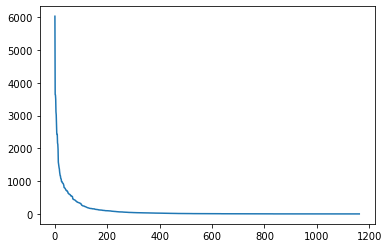

In [55]:
#fig= plt.figure()
pp.plot( valures)
pp.show()


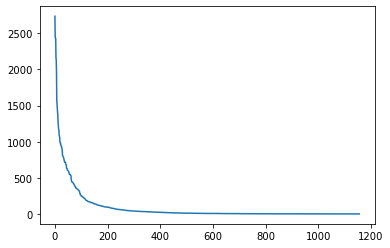

In [56]:
pp.plot( [value for (key, value) in counted.items() if value<3000])
pp.show()

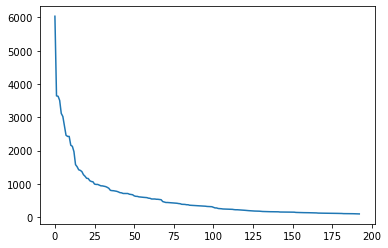

In [59]:
pp.plot( [value for (key, value) in counted.items() if value>100])
pp.show()

In [63]:
len( [value for (key, value) in counted.items() if value>81])

220

In [62]:
import csv
with open('C:/mestrado/histogram.csv', 'w') as f:
    for key in counted.keys():
        f.write("%s,%s\n"%(key,counted[key]))

In [40]:
# 
# agrupa e conta cada token
#
counted

{'O-O': 6034,
 'Nf6': 3644,
 'Nf3': 3633,
 'd4': 3507,
 'e4': 3117,
 'Nc3': 3025,
 'd5': 2736,
 'c5': 2463,
 'e5': 2427,
 'Nc6': 2427,
 'e6': 2163,
 'c4': 2130,
 'd6': 1971,
 'g6': 1581,
 'Be7': 1517,
 'Bg7': 1426,
 'cxd4': 1408,
 'a6': 1372,
 'Be3': 1279,
 'c6': 1231,
 'Bd3': 1170,
 'Nxd4': 1164,
 'Bg5': 1098,
 'g3': 1074,
 'b5': 1065,
 'c3': 996,
 'Be2': 986,
 'h3': 986,
 'Bg2': 966,
 'e3': 944,
 'f4': 942,
 'Qc7': 931,
 'h6': 921,
 'exd5': 899,
 'Nbd7': 870,
 'a3': 809,
 'Bd7': 800,
 'Bb7': 797,
 'cxd5': 789,
 'Nd7': 779,
 'b6': 762,
 'Qd2': 740,
 'f5': 734,
 'b4': 715,
 'd3': 715,
 'Be6': 714,
 'a4': 713,
 'Re1': 692,
 'dxe5': 686,
 'Ne5': 677,
 'O-O-O': 643,
 'a5': 629,
 'b3': 627,
 'Bc4': 613,
 'Bg4': 609,
 'Qe2': 603,
 'Bf4': 598,
 'Nd5': 593,
 'Qc2': 590,
 'Re8': 574,
 'Nxd5': 569,
 'Bd6': 549,
 'Bd2': 549,
 'Nd2': 549,
 'Nxe4': 541,
 'Nbd2': 540,
 'Ne4': 535,
 'f3': 527,
 'Nxe5': 472,
 'exd4': 457,
 'Bb2': 444,
 'Bf5': 444,
 'g4': 440,
 'Qb6': 439,
 'Bb5': 435,
 'Bxf6': 431,
 

In [37]:
from matplotlib.pyplot import figure

In [38]:
figure(num=None, figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<BarContainer object of 1163 artists>

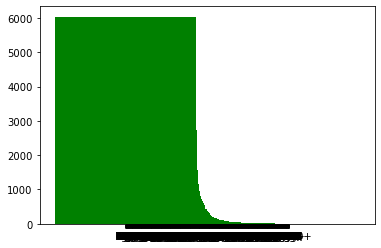

In [39]:
#
# exibir em grafico
#
width= 1000
plt.bar(counted.keys(), counted.values(), width, color='g')